In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [5]:
#Download data
working_dataframe=pd.read_csv('final_dataframe.csv')

In [6]:
working_dataframe.head()

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22


In [7]:
#Drop features that will not be used in this clustering
model_data=working_dataframe.drop(['Borough', 'Neighborhood','Latitude', 'Longitude', 'Top_Restaurant_Category','Number_of_Venues'],  axis=1)

In [8]:
model_data

,Number_of_Restaurants,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Events,Daily_uber_rides
0,5,7,2,9,0,0,0
1,4,4,0,3,2,0,0
2,10,1,1,3,4,0,0
3,3,4,0,4,1,0,0
4,10,1,2,1,1,0,22
...,...,...,...,...,...,...,...
301,61,0,0,0,1,100,20
302,33,0,0,1,2,0,1615
303,0,0,0,0,0,0,1
304,31,0,0,0,0,80,0


In [9]:
#Check statistics for every reatures in order to define bins
model_data['Daily_uber_rides'].describe()

count     306.000000
mean      107.467320
std       395.717038
min         0.000000
25%         0.000000
50%         3.000000
75%        21.500000
max      3651.000000
Name: Daily_uber_rides, dtype: float64

In [10]:
#Create bins for each feature
model_data['Number_of_Restaurants_High'] = np.where(model_data['Number_of_Restaurants']>48, 1, 0)
model_data['Number_of_Restaurants_Low'] = np.where(model_data['Number_of_Restaurants']<7, 1, 0)
model_data['Number_of_Restaurants_Medium'] = np.where((model_data['Number_of_Restaurants']>=7)&(model_data['Number_of_Restaurants']<=48), 1, 0)

In [11]:
model_data['Number_of_HC_Facilities_High'] = np.where(model_data['Number_of_HC_Facilities']>4, 1, 0)
model_data['Number_of_HC_Facilities_Low'] = np.where(model_data['Number_of_HC_Facilities']<2, 1, 0)
model_data['Number_of_HC_Facilities_Medium'] = np.where((model_data['Number_of_HC_Facilities']>=2)&(model_data['Number_of_HC_Facilities']<=4), 1, 0)

In [12]:
model_data['Number_of_Schools_High'] = np.where(model_data['Number_of_Schools']>2, 1, 0)
model_data['Number_of_Schools_Low'] = np.where(model_data['Number_of_Schools']<1, 1, 0)
model_data['Number_of_Schools_Medium'] = np.where((model_data['Number_of_Schools']>=1)&(model_data['Number_of_Schools']<=2), 1, 0)

In [13]:
model_data['Number_of_Bus_Stops_High'] = np.where(model_data['Number_of_Bus_Stops']>2, 1, 0)
model_data['Number_of_Bus_Stops_Low'] = np.where(model_data['Number_of_Bus_Stops']<1, 1, 0)
model_data['Number_of_Bus_Stops_Medium'] = np.where((model_data['Number_of_Bus_Stops']>=1)&(model_data['Number_of_Bus_Stops']<=2), 1, 0)

In [14]:
model_data['Number_of_Events_High'] = np.where(model_data['Number_of_Events']>40, 1, 0)
model_data['Number_of_Events_Low'] = np.where(model_data['Number_of_Events']<1, 1, 0)
model_data['Number_of_Events_Medium'] = np.where((model_data['Number_of_Events']>=1)&(model_data['Number_of_Events']<=40), 1, 0)

In [15]:
model_data['Daily_uber_rides_High'] = np.where(model_data['Daily_uber_rides']>21, 1, 0)
model_data['Daily_uber_rides_Low'] = np.where(model_data['Daily_uber_rides']<4, 1, 0)
model_data['Daily_uber_rides_Medium'] = np.where((model_data['Daily_uber_rides']>=4)&(model_data['Daily_uber_rides']<=21), 1, 0)

In [16]:
#Remove initial features
model_data=model_data.drop(['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools', 'Number_of_Bus_Stops', 'Number_of_Events', 'Daily_uber_rides'], axis=1)

In [17]:
model_data

,Number_of_Restaurants_High,Number_of_Restaurants_Low,Number_of_Restaurants_Medium,Number_of_HC_Facilities_High,Number_of_HC_Facilities_Low,Number_of_HC_Facilities_Medium,Number_of_Schools_High,Number_of_Schools_Low,Number_of_Schools_Medium,Number_of_Bus_Stops_High,Number_of_Bus_Stops_Low,Number_of_Bus_Stops_Medium,Number_of_Events_High,Number_of_Events_Low,Number_of_Events_Medium,Daily_uber_rides_High,Daily_uber_rides_Low,Daily_uber_rides_Medium
0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
302,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0
303,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
304,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [18]:
#Implement Elbow Rule to define the number of clusters
def plot_distortion(model_data,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(model_data)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


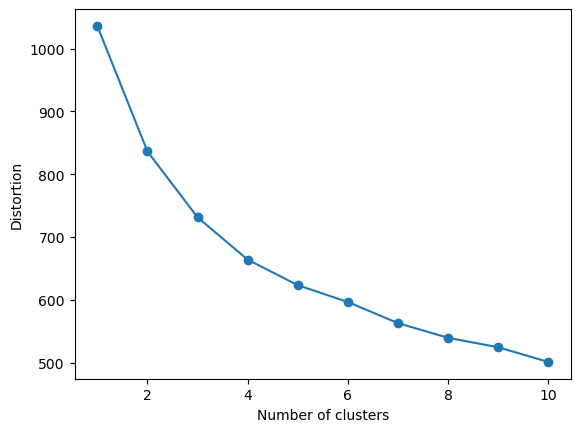

In [19]:
plot_distortion(model_data,max_clusters=10)

In [20]:
#Kmeans Clustering with defined number of Clusters
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [21]:
y_km = km.fit_predict(model_data)

In [22]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = km.labels_
metrics.silhouette_score(model_data, labels, metric='euclidean')

0.19560161570683765

In [90]:
#Inertia
km_inertia=km.inertia_
km_inertia

623.5146557071961

In [34]:
from sklearn.decomposition import PCA
 
#Load Data
data = model_data
pca = PCA(7)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(306, 7)

In [35]:
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 1 0 4 2 3 4 4 1 3 3 3 4 4 4 4 1 1 4 4 1 0 1 0 4 4 0 0 1 4 3 4 4 4 3 4
 3 1 3 0 1 0 1 3 0 3 1 1 2 1 3 3 3 3 1 1 1 1 2 4 2 2 4 2 2 2 3 2 2 2 1 4 0
 0 1 0 4 1 3 1 4 1 1 2 0 2 2 2 4 4 0 3 2 3 1 2 2 4 4 2 0 4 2 2 3 2 2 2 2 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 1 4 4 1 2 1 3 1 1 1 0 1 1
 3 1 3 0 1 4 1 4 1 0 1 4 4 1 4 1 1 1 0 0 1 4 4 0 0 3 2 3 4 4 4 1 3 1 3 4 4
 3 2 3 1 3 1 3 0 0 4 1 3 4 0 4 4 4 0 0 0 1 0 0 3 3 0 1 0 1 3 0 1 0 4 0 1 2
 4 2 0 3 0 0 1 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 2 2 1 0 4 0 0 0 0 4
 3 1 0 3 1 1 3 0 4 3 3 3 2 2 2 2 2 2 2 4 2 4 1 4 2 0 0 0 0 0 3 1 0 0 0 0 1
 0 1 4 4 2 2 4 0 2 0]


In [36]:
#Silhouette Score
labels = kmeans.labels_
metrics.silhouette_score(model_data, labels, metric='euclidean')

0.18776668026391574

In [37]:
#Let us visualize clusters
#PCA -set up
X = model_data
pca_nbhoods = PCA(n_components=10)
components = pca_nbhoods.fit_transform(X)

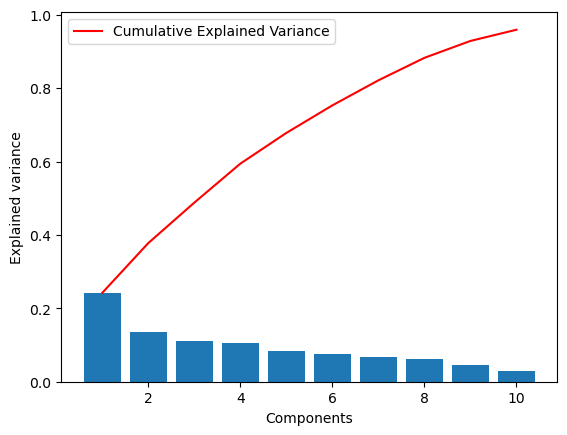

In [38]:
#PCA - define the number of components
plt.bar(range(1,len(pca_nbhoods.explained_variance_ratio_)+1),pca_nbhoods.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_nbhoods.explained_variance_ratio_ )+1),
         np.cumsum(pca_nbhoods.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

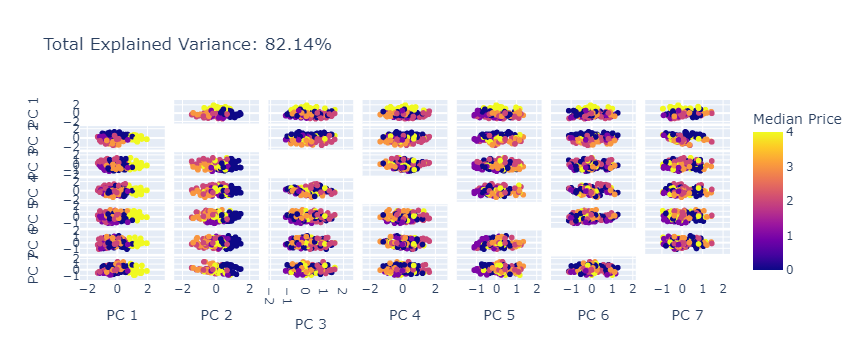

In [39]:
#Visualize PCA with 7 components - besed on explained ratio plot
n_components = 7

pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=y_km,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

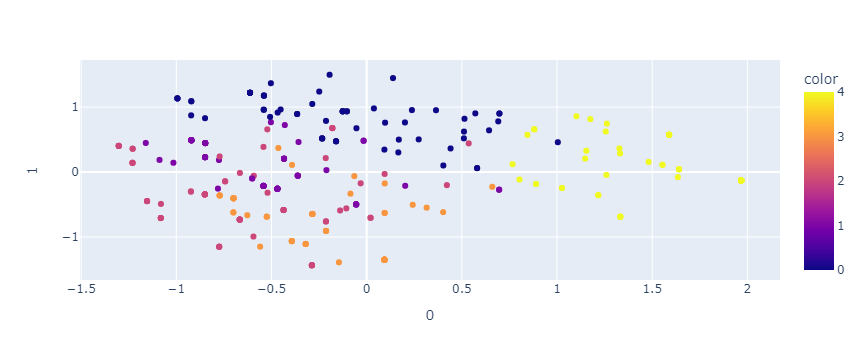

In [40]:
# 2D Scatter Plot
X = model_data

pca_nbhoods = PCA(n_components=2)
components = pca_nbhoods.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

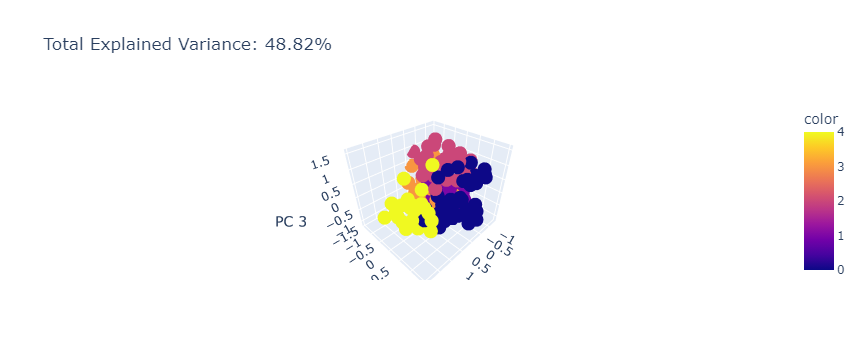

In [41]:
#3D Scatter Plot

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_km,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

So far we prefer Kmeans clustering without PCA as it gives slightly better results for Silhouette score (0.19560161570683765)

In [29]:
#Hirachical clustering

In [42]:
#Explore the Dendrogram
import scipy.cluster.hierarchy as sch

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [43]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

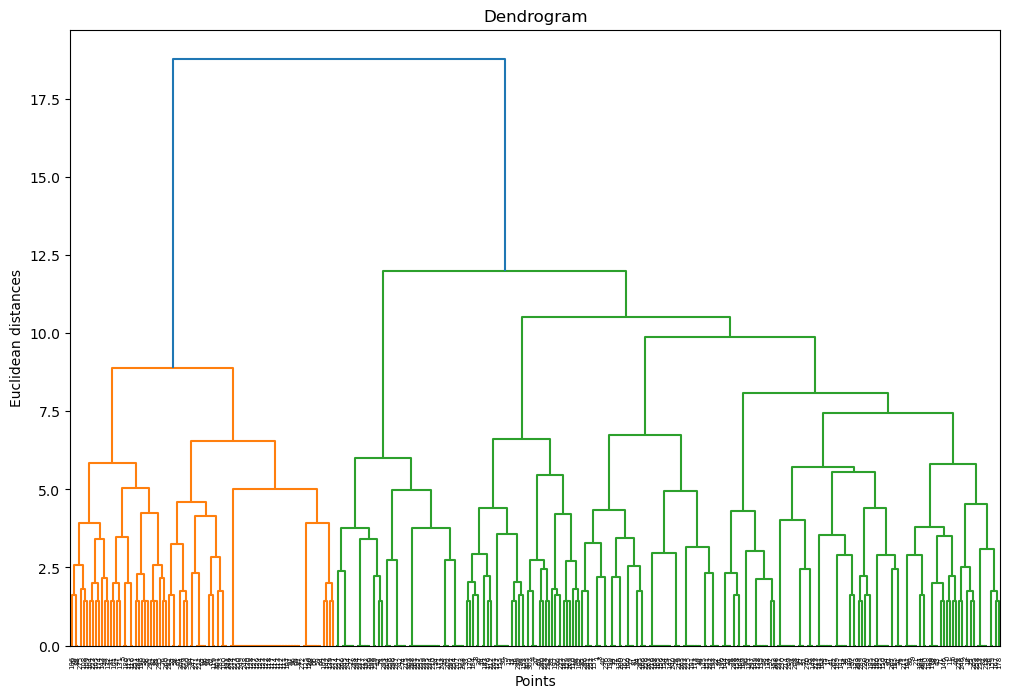

In [44]:
plot_dendrogram(model_data)

In [45]:
# Create an object for Hierarchical Clustering with 2 clusters as per Dendrogram
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [46]:
y_hc = ac.fit_predict(model_data)
y_hc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [48]:
#Evaluate Hierarchical Clustering
metrics.silhouette_score(model_data, y_hc, metric='euclidean') #The score is slightly less than for Kmeans

0.19163974770013

In [50]:
#Try Hierarchical Clustering with PCA (df = pca.fit_transform(data))
hierarch = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
 
#predict the labels of clusters.
label_hierarch = hierarch.fit_predict(df)
 
print(label_hierarch)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0]


In [51]:
#Evaluate Hierarchical clustering after PCA
metrics.silhouette_score(model_data, label_hierarch, metric='euclidean')

0.1954310876911629

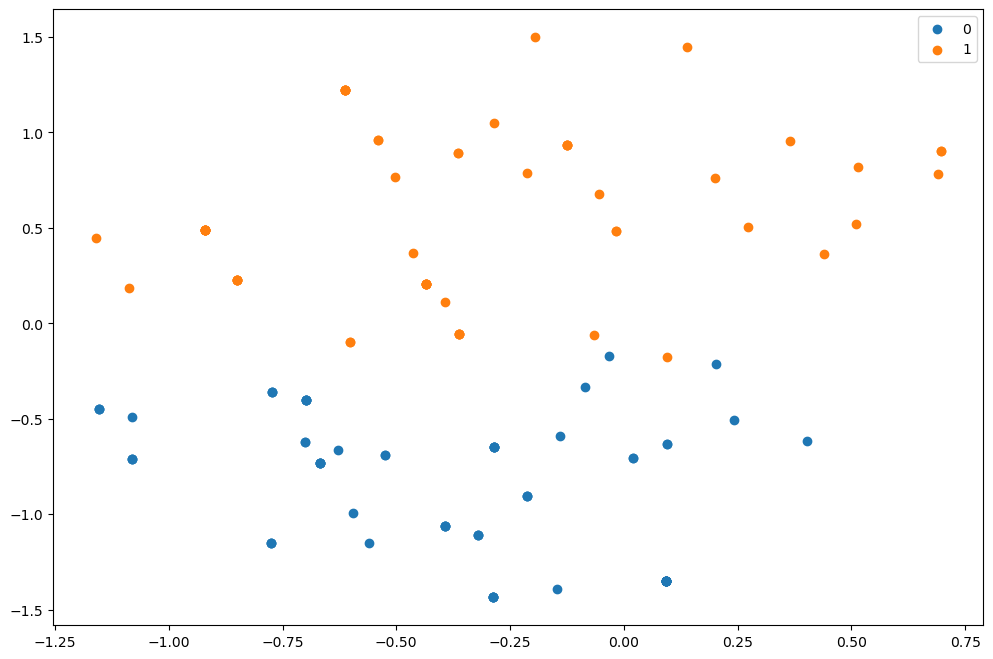

In [52]:
#Plot clusters after PCA
 
u_labels = np.unique(label_hierarch)
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [41]:
#Try DBScan

In [53]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [54]:
y_db = db.fit_predict(X)

In [55]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1,  0, -1,  1,  2, -1,  3, -1, -1,  0, -1,
        4, -1, -1, -1,  1, -1, -1,  5, -1, -1,  6, -1,  7,  0, -1, -1, -1,
       -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  2, -1, -1, -1,  8, -1, -1,
       -1, -1,  9, 10, -1, -1, -1, -1, 11, -1, -1, -1, -1, 11, -1, 11, -1,
       11, 12, -1, -1, -1, -1, 13,  4, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, 12, -1, -1, -1, -1, 10, -1, -1, -1, 12, 12, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 12, -1, -1, -1, 12, 12, 12, 12, -1, -1, 12, 12,
       -1, 11, -1, 12, 12, 12, 11, 12, 12, 12, -1, 12, -1, -1, -1,  8,  8,
       -1, -1,  8, -1, -1,  3, -1, -1, -1, -1, -1,  7, -1,  8, 10, -1, -1,
       -1,  7,  0,  7, -1, -1, -1, -1,  1, -1,  4, -1,  7, -1, -1,  7, -1,
       -1,  5, 14,  2, -1, 10, -1,  0, -1, -1, 10,  4, 10, -1, -1, -1, -1,
       -1, -1,  3, -1,  2, 15, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, 14,
       -1, -1, 15, 14,  9,  9,  5,  1, -1,  4,  9, 13,  7, 15, -1, -1, -1,
       -1, -1, -1, -1,  2

In [57]:
#Evaluate DBScan
labels = db.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.16303374377203522

In [58]:
X.shape

(306, 18)

In [61]:
#Get Clusters for each observation by Kmeans clustering (best by score and interpretability)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = model_data.index.values
cluster_map['cluster'] = km.labels_

cluster_map

,data_index,cluster
0,0,3
1,1,2
2,2,1
3,3,2
4,4,2
...,...,...
301,301,4
302,302,2
303,303,3
304,304,1


In [62]:
#Add clusters to model_data
model_data['Cluster']=cluster_map['cluster']

In [63]:
model_data

,Number_of_Restaurants_High,Number_of_Restaurants_Low,Number_of_Restaurants_Medium,Number_of_HC_Facilities_High,Number_of_HC_Facilities_Low,Number_of_HC_Facilities_Medium,Number_of_Schools_High,Number_of_Schools_Low,Number_of_Schools_Medium,Number_of_Bus_Stops_High,Number_of_Bus_Stops_Low,Number_of_Bus_Stops_Medium,Number_of_Events_High,Number_of_Events_Low,Number_of_Events_Medium,Daily_uber_rides_High,Daily_uber_rides_Low,Daily_uber_rides_Medium,Cluster
0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,3
1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,2
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1
3,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,2
4,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,4
302,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,2
303,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,3
304,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1


In [64]:
#Change order of columns for easier analysis
model_data=model_data[['Cluster','Number_of_Restaurants_High',
       'Number_of_Restaurants_Medium', 'Number_of_Restaurants_Low','Number_of_HC_Facilities_High',
       'Number_of_HC_Facilities_Medium','Number_of_HC_Facilities_Low',
       'Number_of_Schools_High', 'Number_of_Schools_Medium', 'Number_of_Schools_Low',
       'Number_of_Bus_Stops_High','Number_of_Bus_Stops_Medium',
       'Number_of_Bus_Stops_Low', 'Number_of_Events_High', 
       'Number_of_Events_Medium', 'Number_of_Events_Low', 'Daily_uber_rides_High','Daily_uber_rides_Medium', 
       'Daily_uber_rides_Low']]

In [65]:
model_data


,Cluster,Number_of_Restaurants_High,Number_of_Restaurants_Medium,Number_of_Restaurants_Low,Number_of_HC_Facilities_High,Number_of_HC_Facilities_Medium,Number_of_HC_Facilities_Low,Number_of_Schools_High,Number_of_Schools_Medium,Number_of_Schools_Low,Number_of_Bus_Stops_High,Number_of_Bus_Stops_Medium,Number_of_Bus_Stops_Low,Number_of_Events_High,Number_of_Events_Medium,Number_of_Events_Low,Daily_uber_rides_High,Daily_uber_rides_Medium,Daily_uber_rides_Low
0,3,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,2,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
2,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,2,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
4,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,4,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
302,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
303,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
304,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1


In [66]:
#Add clusters to initial working dataframe
working_dataframe['Cluster']=model_data['Cluster']

In [67]:
working_dataframe

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0,3
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0,2
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0,1
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0,2
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,61,Thai Restaurant,0,0,0,1,133,100,20,4
302,Queens,Hammels,40.587338,-73.805530,33,Seafood Restaurant,0,0,1,2,80,0,1615,2
303,Queens,Bayswater,40.611322,-73.765968,0,Vietnamese Restaurant,0,0,0,0,19,0,1,3
304,Queens,Queensbridge,40.756091,-73.945631,31,Spanish Restaurant,0,0,0,0,75,80,0,1


In [68]:
#Write working dataframe with clusters to file
working_dataframe.to_csv('NYC_binned_clusters_to_map.csv', index=False)

In [69]:
#Take means of every feature for each cluster
model_data=model_data.groupby(['Cluster'], as_index=False).mean()

In [70]:
model_data

,Cluster,Number_of_Restaurants_High,Number_of_Restaurants_Medium,Number_of_Restaurants_Low,Number_of_HC_Facilities_High,Number_of_HC_Facilities_Medium,Number_of_HC_Facilities_Low,Number_of_Schools_High,Number_of_Schools_Medium,Number_of_Schools_Low,Number_of_Bus_Stops_High,Number_of_Bus_Stops_Medium,Number_of_Bus_Stops_Low,Number_of_Events_High,Number_of_Events_Medium,Number_of_Events_Low,Daily_uber_rides_High,Daily_uber_rides_Medium,Daily_uber_rides_Low
0,0,0.078125,0.906250,0.015625,0.281250,0.375000,0.343750,0.281250,0.515625,0.203125,0.062500,0.234375,0.703125,0.093750,0.187500,0.718750,0.281250,0.718750,0.000000
1,1,0.031250,0.968750,0.000000,0.281250,0.375000,0.343750,0.234375,0.421875,0.343750,0.093750,0.000000,0.906250,0.031250,0.078125,0.890625,0.000000,0.000000,1.000000
2,2,0.125000,0.468750,0.406250,0.312500,0.312500,0.375000,0.187500,0.343750,0.468750,0.000000,1.000000,0.000000,0.015625,0.000000,0.984375,0.140625,0.078125,0.781250
3,3,0.038462,0.000000,0.961538,0.211538,0.326923,0.461538,0.173077,0.307692,0.519231,0.076923,0.000000,0.923077,0.000000,0.019231,0.980769,0.076923,0.096154,0.826923
4,4,0.967742,0.032258,0.000000,0.064516,0.096774,0.838710,0.048387,0.209677,0.741935,0.000000,0.064516,0.935484,0.838710,0.080645,0.080645,0.741935,0.161290,0.096774


In [72]:
#Write clusters with feature means to file
model_data.to_csv('NYC_Clusters_binned_new.csv', index=False)

In [73]:
#Let us add economic data for each cluster
housing=pd.read_csv('NYC_housing.csv')

In [93]:
housing

,neighborhood,2021_2_bedroom
0,Allerton,1800.0
1,Arden Heights,2250.0
2,Astoria,2200.0
3,Auburndale,2175.0
4,Bath Beach,1825.0
...,...,...
200,Windsor Terrace,2952.0
201,Woodhaven,1925.0
202,Woodlawn Heights,2100.0
203,Woodside,2173.0


In [74]:
#Merge dataframes on neoghborhood in order to assign housing price to each neighborhood 
cluster_housing=working_dataframe.merge(housing, how='left', left_on='Neighborhood', right_on='neighborhood')

In [75]:
cluster_housing

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster,neighborhood,2021_2_bedroom
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0,3,Wakefield,1800.0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0,2,NaN,NaN
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0,1,NaN,NaN
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0,2,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22,2,Riverdale,2600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,61,Thai Restaurant,0,0,0,1,133,100,20,4,NaN,NaN
302,Queens,Hammels,40.587338,-73.805530,33,Seafood Restaurant,0,0,1,2,80,0,1615,2,NaN,NaN
303,Queens,Bayswater,40.611322,-73.765968,0,Vietnamese Restaurant,0,0,0,0,19,0,1,3,NaN,NaN
304,Queens,Queensbridge,40.756091,-73.945631,31,Spanish Restaurant,0,0,0,0,75,80,0,1,NaN,NaN


In [77]:
#Estract only cluster and housing price
cluster_housing=cluster_housing.loc[:,['Cluster', '2021_2_bedroom']]

In [78]:
#Find mean housing price for each cluster
cluster1_housing=cluster_housing.loc[cluster_housing['Cluster']==0]
cluster1_housing_mean=cluster1_housing['2021_2_bedroom'].mean(skipna=True)

In [79]:
cluster2_housing=cluster_housing.loc[cluster_housing['Cluster']==1]
cluster2_housing_mean=cluster2_housing['2021_2_bedroom'].mean(skipna=True)

In [80]:
cluster3_housing=cluster_housing.loc[cluster_housing['Cluster']==2]
cluster3_housing_mean=cluster3_housing['2021_2_bedroom'].mean(skipna=True)

In [81]:
cluster4_housing=cluster_housing.loc[cluster_housing['Cluster']==3]
cluster4_housing_mean=cluster4_housing['2021_2_bedroom'].mean(skipna=True)

In [82]:
cluster5_housing=cluster_housing.loc[cluster_housing['Cluster']==4]
cluster5_housing_mean=cluster5_housing['2021_2_bedroom'].mean(skipna=True)

In [83]:
print(cluster1_housing_mean)
print(cluster2_housing_mean)
print(cluster3_housing_mean)
print(cluster4_housing_mean)
print(cluster5_housing_mean)

2103.0666666666666
2004.0263157894738
2219.65625
1982.3529411764705
3206.3793103448274


In [85]:
#Add column with means to the modelling dataframe
model_data['2BDR_rent']=['2103.07', '2004.03', '2219.66', '1982.35', '3206.38']

In [86]:
model_data.to_csv('NYC_Clusters_binned_new_rent.csv', index=False)

In [87]:
#Find top restaurant for each cluster
cluster_restaurants=working_dataframe.loc[:, ['Cluster', 'Top_Restaurant_Category']].groupby(['Cluster'], as_index=False).max()

In [88]:
#Write restaurants to separate file
cluster_restaurants.to_csv('cluster_restaurants.csv', index=False)